# Guided Project: Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:
- `Major_code` - Major code.
- `Major`- Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.


In [1]:
import pandas as pd
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
recent_grads.head()
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [3]:
raw_data_count = recent_grads.shape[0]
recent_grads.dropna(inplace = True)  # dropping rows containing missing values
cleaned_data_count = recent_grads.shape[0]

In [4]:
print(raw_data_count, cleaned_data_count)

173 172


As one can see, one row with missing values has been dropped from our dataset.

### Pandas, Scatter Plots

We will plot the scatter plot among various columns to understand the corelation between them

#### Scatter plot : `Sample_size` vs `Median`

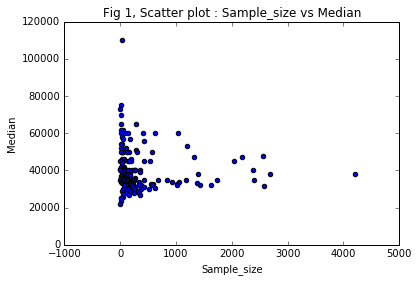

In [5]:
ax1 = recent_grads.plot(x = 'Sample_size', y= 'Median', 
                        title = 'Fig 1, Scatter plot : Sample_size vs Median',
                        kind = 'scatter' )

One can observe that there is no corelation whatsoever b/w `Sample_size` and `Median`. As the former increases, the latter is unchanged.
#### Scatter plot : `Sample_size` vs `Unemployment_rate`

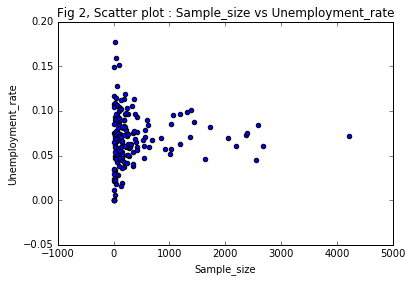

In [6]:
ax2 = recent_grads.plot(x = 'Sample_size', y= 'Unemployment_rate', 
                        title = 'Fig 2, Scatter plot : Sample_size vs Unemployment_rate',
                        kind = 'scatter' )

#### Scatter plot : `Full_time` vs `Median`

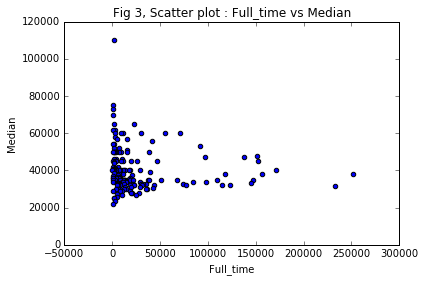

In [7]:
ax3 = recent_grads.plot(x = 'Full_time', y= 'Median', 
                        title = 'Fig 3, Scatter plot : Full_time vs Median',
                        kind = 'scatter' )

#### Scatter plot : `ShareWomen` vs `Unemployment_rate` 

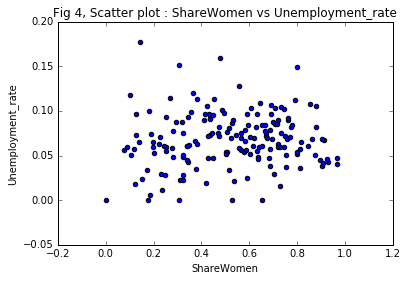

In [8]:
ax4 = recent_grads.plot(x = 'ShareWomen', y= 'Unemployment_rate', 
                        title = 'Fig 4, Scatter plot : ShareWomen vs Unemployment_rate',
                        kind = 'scatter' )

#### Scatter plot : `Men` vs `Median` 

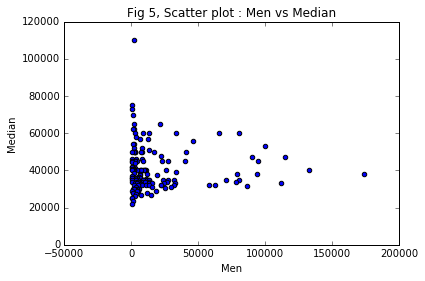

In [9]:
ax5 = recent_grads.plot(x = 'Men', y= 'Median', 
                        title = 'Fig 5, Scatter plot : Men vs Median',
                        kind = 'scatter' )

#### Scatter plot : `Men` vs `Median` 

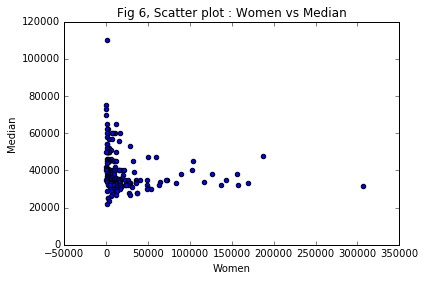

In [10]:
ax6 = recent_grads.plot(x = 'Women', y= 'Median', 
                        title = 'Fig 6, Scatter plot : Women vs Median',
                        kind = 'scatter' )

#### Scatter plot : `ShareWomen` vs `Median` 

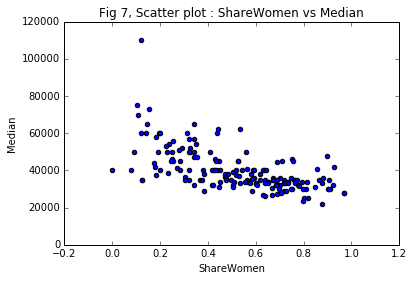

In [11]:
ax7 = recent_grads.plot(x = 'ShareWomen', y= 'Median', 
                        title = 'Fig 7, Scatter plot : ShareWomen vs Median',
                        kind = 'scatter' )

#### Some questions based on the above scatter plots
1. **Do students in more popular majors make more money?**
     No, Fig 5 and Fig 6 imply that the median salary is not high for high number of men and women attending the courses
     
2. **Do students that majored in subjects that were majority female make more money?**
    No, Fig 7 says there is a negative corelation. As the shareWomen percentage increases, the median income drops.
    
3. **Is there any link between the number of full-time employees and median salary?**
    Even though the median income is very high for a lower full time employees, as the number increases the scatter plot mean is parallel to the `x-axis`suggesting nocorelation later on

### Histograms

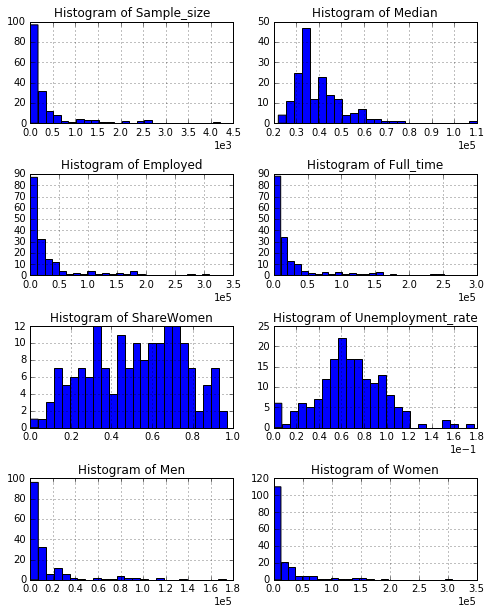

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,10))
fig.subplots_adjust(hspace = 0.5)
int_cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 
            'Unemployment_rate', 'Men', 'Women']

for idx, col in enumerate(int_cols):
    title_str = 'Histogram of '+ str(col)
    ax = fig.add_subplot(4, 2, idx + 1)
    ax = recent_grads[col].hist(bins = 25)
    ax.set_title(title_str)
    ax.ticklabel_format(axis = 'x', style = 'sci', scilimits = (-1,1))

plt.show()
    

Using the above plots, we will try to explore the following questions:

**What percent of majors are predominantly male? Predominantly female?**

Refer the histogram of `ShareWomen`. If it is less than 0.5, it means the course is predominantly male. From the graph it can be observed that more than 60% of the courses are predominantly female

**What's the most common median salary range?**

35k - 40k. Refer the histogram of `Median`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7910c63c8>,
      dtype=object)

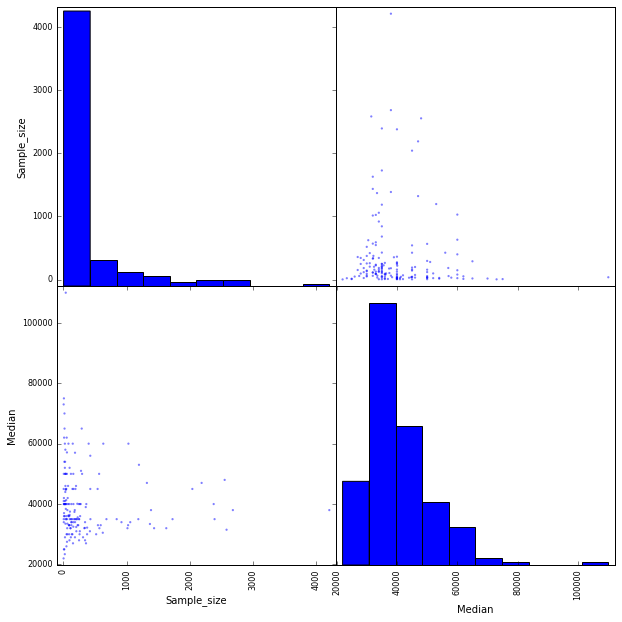

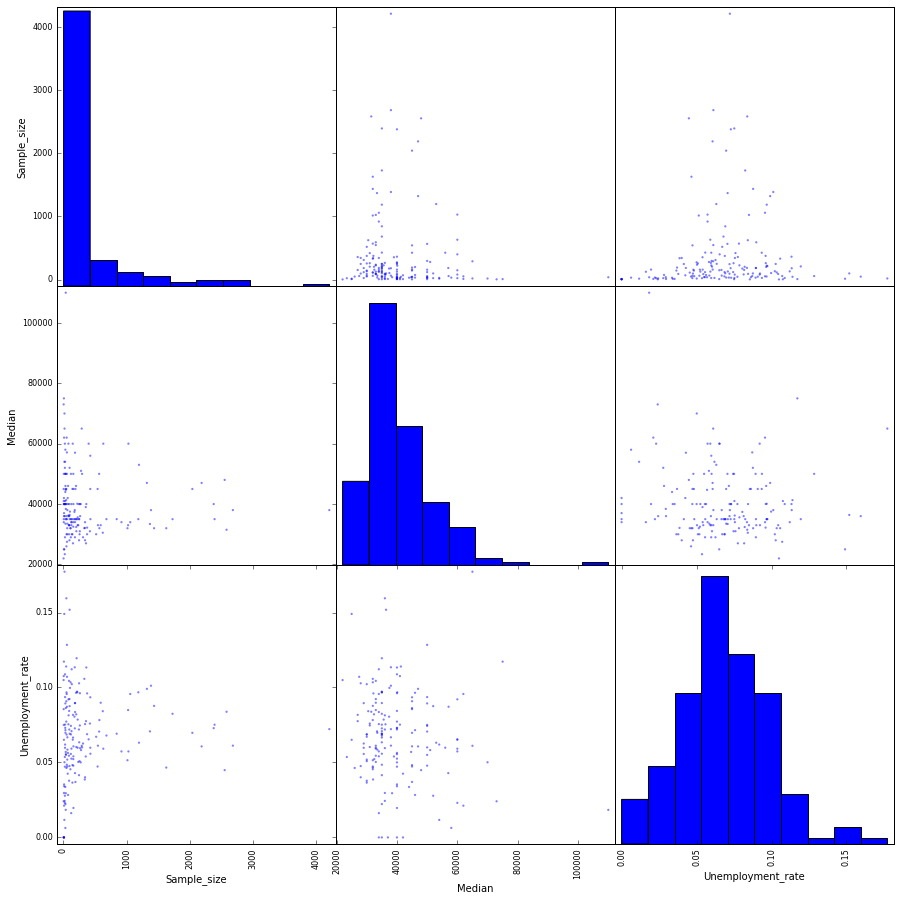

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10, 10))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (15, 15))

Ont thing is certain, there is no corelation between `Sample_size`, `Median`, `Unemployment_rate`. As a variable increases, the other variable doesn't change.

#### Bar plot to compare the percentages of women (`ShareWomen`) from the first ten rows and last ten rows of the `recent_grads` dataframe

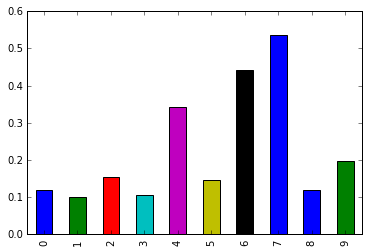

In [26]:
recent_grads['ShareWomen'].head(10).plot.bar()

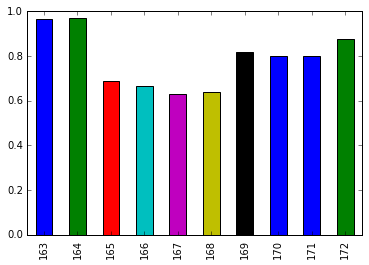

In [25]:
recent_grads['ShareWomen'].tail(10).plot.bar()